<a href="https://colab.research.google.com/github/syuniGo/stock-markets-analytics-zoomcamp/blob/main/week2_homework1_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install yfinance

# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


In [ ]:

import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:


ipos_filings = ipo_dfs[0]
ipos_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filing Date     325 non-null    object
 1   Symbol          325 non-null    object
 2   Company Name    325 non-null    object
 3   Price Range     325 non-null    object
 4   Shares Offered  325 non-null    object
dtypes: object(5)
memory usage: 12.8+ KB


In [ ]:
ipos_filings

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,-
1,"Apr 29, 2024",HWEC,"HW Electro Co., Ltd.",$3.00,3750000
2,"Apr 29, 2024",DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000
3,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000
4,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,-
...,...,...,...,...,...
320,"Jan 21, 2020",GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000
321,"Jan 21, 2020",UTXO,"UTXO Acquisition, Inc.",$10.00,5000000
322,"Dec 9, 2019",LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000
323,"Oct 4, 2019",ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000


In [8]:
ipos_filings['Filing Date'] = pd.to_datetime(ipos_filings['Filing Date'], format='%b %d, %Y')
ipos_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Filing Date     325 non-null    datetime64[ns]
 1   Symbol          325 non-null    object        
 2   Company Name    325 non-null    object        
 3   Price Range     325 non-null    object        
 4   Shares Offered  325 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 12.8+ KB


In [9]:
# ipos_filings = ipos_filings[ipos_filings['Shares Offered'].astype(str).str.find('-') >= 0]
ipos_filings['Shares Offered'] = pd.to_numeric(ipos_filings['Shares Offered'], errors='coerce')


In [10]:
ipos_filings
import re
ipos_filings

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,2024-05-03,TBN,Tamboran Resources Corporation,-,NaN
1,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0
2,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0
3,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0
4,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN
...,...,...,...,...,...
320,2020-01-21,GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0
321,2020-01-21,UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0
322,2019-12-09,LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0
323,2019-10-04,ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0


In [11]:
# ipos_filings['Avg_price'] = ipos_filings['Current'] - stacked_ipos_df['IPO Price']


In [12]:
import re
import numpy as np

def extract_numbers(input_string):
    # num1 = re.search(r'$(\d+)', input_string)
    # num2 = re.search(r'-$(\d+)', input_string)
    print(input_string)
    numbers = re.findall(r"\d+\.\d+", input_string)  # 提取所有数字
    print(numbers)
    # fnum1 = int(y_match.group(1)) if y_match
    # fnum2 = int(m_match.group(1)) if m_match
    print(len(numbers))
    if len(numbers) == 0:
      return np.nan
    elif len(numbers) == 1:
      return float(numbers[0])
    else:
      return (float(numbers[0]) + float(numbers[1]))/2

# Examples
examples = ["$8.00 - $10.00", "$10.00", "-"]
for example in examples:
    print(example)
    res = extract_numbers(example)
    print(f"{example} ==> {res}")



$8.00 - $10.00
$8.00 - $10.00
['8.00', '10.00']
2
$8.00 - $10.00 ==> 9.0
$10.00
$10.00
['10.00']
1
$10.00 ==> 10.0
-
-
[]
0
- ==> nan


In [13]:
# str_ = "$5.00 - $6.50"
# numbers = re.findall(r"\d+\.\d+", str_)  # 提取所有数字
# print(numbers)  # 输出结果：['5.00', '6.50']

In [14]:
ipos_filings['Avg_price'] = ipos_filings['Price Range'].apply(lambda x:extract_numbers(x))

-
[]
0
$3.00
['3.00']
1
$10.00
['10.00']
1
$10.00
['10.00']
1
-
[]
0
$5.00
['5.00']
1
$10.00
['10.00']
1
$5.00
['5.00']
1
-
[]
0
-
[]
0
$4.00 - $5.00
['4.00', '5.00']
2
$4.00 - $4.50
['4.00', '4.50']
2
$4.00 - $5.00
['4.00', '5.00']
2
-
[]
0
-
[]
0
$4.00 - $5.00
['4.00', '5.00']
2
$5.00 - $6.00
['5.00', '6.00']
2
-
[]
0
$10.00
['10.00']
1
-
[]
0
$5.00 - $7.00
['5.00', '7.00']
2
-
[]
0
$4.00 - $6.00
['4.00', '6.00']
2
$10.00
['10.00']
1
-
[]
0
$4.00 - $6.00
['4.00', '6.00']
2
-
[]
0
$3.00 - $4.00
['3.00', '4.00']
2
-
[]
0
$4.00 - $5.00
['4.00', '5.00']
2
$4.00
['4.00']
1
$4.00 - $5.00
['4.00', '5.00']
2
$4.00 - $5.00
['4.00', '5.00']
2
$4.13
['4.13']
1
-
[]
0
-
[]
0
$5.00
['5.00']
1
$4.00 - $5.00
['4.00', '5.00']
2
-
[]
0
$4.00 - $6.00
['4.00', '6.00']
2
$4.00 - $5.00
['4.00', '5.00']
2
$5.00 - $6.00
['5.00', '6.00']
2
-
[]
0
$10.00 - $14.00
['10.00', '14.00']
2
$4.00 - $6.00
['4.00', '6.00']
2
-
[]
0
$4.00 - $6.00
['4.00', '6.00']
2
-
[]
0
-
[]
0
$10.00
['10.00']
1
$3.50 - $4.50
['3.50

In [15]:
ipos_filings

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price
0,2024-05-03,TBN,Tamboran Resources Corporation,-,NaN,NaN
1,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,3.00
2,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,10.00
3,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0,10.00
4,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN,NaN
...,...,...,...,...,...,...
320,2020-01-21,GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0,9.00
321,2020-01-21,UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0,10.00
322,2019-12-09,LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0,9.00
323,2019-10-04,ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0,4.00


In [16]:
ipos_filings['Shares_offered_value'] = ipos_filings['Shares Offered']* ipos_filings['Avg_price']

In [17]:
ipos_filings

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price,Shares_offered_value
0,2024-05-03,TBN,Tamboran Resources Corporation,-,NaN,NaN,NaN
1,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,3.00,11250000.0
2,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,10.00,60000000.0
3,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0,10.00,50000000.0
4,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN,NaN,NaN
...,...,...,...,...,...,...,...
320,2020-01-21,GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0,9.00,13500000.0
321,2020-01-21,UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0,10.00,50000000.0
322,2019-12-09,LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0,9.00,22500000.0
323,2019-10-04,ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0,4.00,17200000.0


In [18]:
ipos_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Filing Date           325 non-null    datetime64[ns]
 1   Symbol                325 non-null    object        
 2   Company Name          325 non-null    object        
 3   Price Range           325 non-null    object        
 4   Shares Offered        252 non-null    float64       
 5   Avg_price             258 non-null    float64       
 6   Shares_offered_value  249 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 17.9+ KB


In [19]:
ipos_filings['Filing Date'].dt.year

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
320    2020
321    2020
322    2019
323    2019
324    2018
Name: Filing Date, Length: 325, dtype: int32

In [20]:
ipos_filings[(ipos_filings['Filing Date'].dt.year == 2023) & (ipos_filings['Filing Date'].dt.dayofweek == 4)].Shares_offered_value.sum()/1000000

285.7

In [21]:
def getStockanalysis(urllist):
  headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
  }
  df = None;
  for url in urllist:
    response = requests.get(url, headers=headers)
    ipo_dfs = pd.read_html(response.text)[0]
    print(ipo_dfs.head)
    # print(ipo_dfs.info())
    if df is None:
      df = ipo_dfs
      print(df.head)

    else:
      print('else---------')

      df = pd.concat([df, ipo_dfs], ignore_index=True)
    print('over---------')

  return df




In [22]:
stacked_ipos_df = getStockanalysis(
    ["https://stockanalysis.com/ipos/2023/"
    ,"https://stockanalysis.com/ipos/2024/"
     ])


<bound method NDFrame.head of          IPO Date Symbol                             Company Name IPO Price  \
0    Dec 27, 2023   IROH            Iron Horse Acquisitions Corp.    $10.00   
1    Dec 19, 2023   LGCB                       Linkage Global Inc     $4.00   
2    Dec 15, 2023    ZKH                        ZKH Group Limited    $15.50   
3    Dec 15, 2023   BAYA                 Bayview Acquisition Corp    $10.00   
4    Dec 14, 2023   INHD                       Inno Holdings Inc.     $4.00   
..            ...    ...                                      ...       ...   
149  Jan 25, 2023    QSG                     QuantaSing Group Ltd    $12.50   
150  Jan 20, 2023   CVKD              Cadrenal Therapeutics, Inc.     $5.00   
151  Jan 13, 2023   SKWD  Skyward Specialty Insurance Group, Inc.    $15.00   
152  Jan 13, 2023   ISRL                 Israel Acquisitions Corp    $10.00   
153  Jan 13, 2023   MGOL                          MGO Global Inc.     $5.00   

    Current   Return 

In [23]:
stacked_ipos_df.dtypes
# stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])


IPO Date        object
Symbol          object
Company Name    object
IPO Price       object
Current         object
Return          object
dtype: object

In [24]:
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])

In [25]:
stacked_ipos_df = stacked_ipos_df[(stacked_ipos_df['IPO Date'] < '2024-03-01') & (stacked_ipos_df['Symbol'] != 'RYZB')]

In [26]:
stacked_ipos_df.dtypes

IPO Date        datetime64[ns]
Symbol                  object
Company Name            object
IPO Price               object
Current                 object
Return                  object
dtype: object

In [27]:
stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])

<ipython-input-27-132c1ec3fc4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
<ipython-input-27-132c1ec3fc4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])


In [28]:
stacked_ipos_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2023-12-27,IROH,Iron Horse Acquisitions Corp.,10.00,$10.05,0.50%
1,2023-12-19,LGCB,Linkage Global Inc,4.00,$2.91,-27.25%
2,2023-12-15,ZKH,ZKH Group Limited,15.50,$12.95,-16.45%
3,2023-12-15,BAYA,Bayview Acquisition Corp,10.00,$10.18,1.80%
4,2023-12-14,INHD,Inno Holdings Inc.,4.00,$0.62,-84.45%
...,...,...,...,...,...,...
213,2024-01-18,PSBD,Palmer Square Capital BDC Inc.,16.45,$16.55,0.61%
214,2024-01-18,CCTG,CCSC Technology International Holdings Limited,6.00,$2.41,-59.83%
215,2024-01-12,SYNX,Silynxcom Ltd.,4.00,$2.74,-31.50%
216,2024-01-11,SDHC,Smith Douglas Homes Corp.,21.00,$29.68,41.33%


In [29]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100


In [30]:
stacked_ipos_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      184 non-null    datetime64[ns]
 1   Symbol        184 non-null    object        
 2   Company Name  184 non-null    object        
 3   IPO Price     184 non-null    float64       
 4   Current       184 non-null    float64       
 5   Return        184 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.1+ KB


In [31]:
stacked_ipos_df.isnull().sum()

IPO Date        0
Symbol          0
Company Name    0
IPO Price       0
Current         0
Return          0
dtype: int64

In [32]:
stacked_ipos_df[stacked_ipos_df.Return.isnull()]


,IPO Date,Symbol,Company Name,IPO Price,Current,Return


In [33]:
stacked_ipos_df.describe()

,IPO Date,IPO Price,Current,Return
count,184,184.000000,184.000000,184.000000
mean,2023-08-01 01:57:23.478260992,10.449076,9.859185,-0.254271
min,2023-01-13 00:00:00,2.500000,0.000000,-0.999600
25%,2023-04-04 00:00:00,4.000000,1.117500,-0.742325
50%,2023-07-26 12:00:00,8.000000,5.355000,-0.387100
75%,2023-11-11 00:00:00,12.000000,10.720000,0.050250
max,2024-02-27 00:00:00,92.000000,120.520000,2.597500
std,NaN,9.894117,15.538189,0.643848


In [34]:
ALL_TICKERS = stacked_ipos_df['Symbol'].replace('PTHR','PTHRF')

In [35]:
ALL_TICKERS.tolist()


['IROH',
 'LGCB',
 'ZKH',
 'BAYA',
 'INHD',
 'AFJK',
 'GSIW',
 'FEBO',
 'CLBR',
 'ELAB',
 'RR',
 'DDC',
 'SHIM',
 'GLAC',
 'SGN',
 'HG',
 'CRGX',
 'ANSC',
 'AITR',
 'GVH',
 'LXEO',
 'PAPL',
 'ATGL',
 'MNR',
 'WBUY',
 'NCL',
 'BIRK',
 'GMM',
 'PMEC',
 'LRHC',
 'GPAK',
 'SPKL',
 'QETA',
 'MSS',
 'ANL',
 'SYRA',
 'VSME',
 'LRE',
 'TURB',
 'MDBH',
 'KVYO',
 'CART',
 'DTCK',
 'NMRA',
 'ARM',
 'SPPL',
 'NWGL',
 'SWIN',
 'IVP',
 'NNAG',
 'SRM',
 'SPGC',
 'LQR',
 'NRXS',
 'FTEL',
 'MIRA',
 'PXDT',
 'HRYU',
 'CTNT',
 'SRFM',
 'PRZO',
 'HYAC',
 'KVAC',
 'JNVR',
 'ELWS',
 'WRNT',
 'TSBX',
 'ODD',
 'APGE',
 'NETD',
 'SGMT',
 'BOWN',
 'SXTP',
 'PWM',
 'VTMX',
 'INTS',
 'SVV',
 'KGS',
 'FIHL',
 'GENK',
 'BUJA',
 'BOF',
 'AZTR',
 'CAVA',
 'ESHA',
 'ATMU',
 'ATS',
 'IPXX',
 'CWD',
 'SGE',
 'SLRN',
 'ALCY',
 'KVUE',
 'GODN',
 'TRNR',
 'AACT',
 'JYD',
 'USGO',
 'UCAR',
 'WLGS',
 'TPET',
 'TCJH',
 'GDTC',
 'VCIG',
 'GDHG',
 'ARBB',
 'ISPR',
 'MGIH',
 'MWG',
 'HSHP',
 'SFWL',
 'SYT',
 'HKIT',
 'CHSN',
 'T

In [36]:
for i,t in enumerate(ALL_TICKERS):
  try:
    ticker = yf.Ticker(t)
    info = None

    info = ticker.info
  except:
    print('fff',t)
    print(f"Cannot get info of {t}, it probably does not exist")
    continue

  # Got the info of the ticker, do more stuff with it
  #print(f"Info of {t}: {info}")


In [37]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 IROH


[*********************100%%**********************]  1 of 1 completed


1 LGCB


[*********************100%%**********************]  1 of 1 completed


2 ZKH


[*********************100%%**********************]  1 of 1 completed


3 BAYA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

4 INHD


5 AFJK


[*********************100%%**********************]  1 of 1 completed


6 GSIW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

7 FEBO


8 CLBR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

9 ELAB



[*********************100%%**********************]  1 of 1 completed

10 RR



[*********************100%%**********************]  1 of 1 completed

11 DDC



[*********************100%%**********************]  1 of 1 completed

12 SHIM



[*********************100%%**********************]  1 of 1 completed

13 GLAC



[*********************100%%**********************]  1 of 1 completed

14 SGN



[*********************100%%**********************]  1 of 1 completed

15 HG



[*********************100%%**********************]  1 of 1 completed

16 CRGX



[*********************100%%**********************]  1 of 1 completed

17 ANSC



[*********************100%%**********************]  1 of 1 completed

18 AITR


19 GVH


[*********************100%%**********************]  1 of 1 completed


20 LXEO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

21 PAPL



[*********************100%%**********************]  1 of 1 completed

22 ATGL



[*********************100%%**********************]  1 of 1 completed

23 MNR


24 WBUY


[*********************100%%**********************]  1 of 1 completed


25 NCL


[*********************100%%**********************]  1 of 1 completed


26 BIRK


[*********************100%%**********************]  1 of 1 completed


27 GMM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

28 PMEC



[*********************100%%**********************]  1 of 1 completed

29 LRHC


30 GPAK


[*********************100%%**********************]  1 of 1 completed


31 SPKL


[*********************100%%**********************]  1 of 1 completed


32 QETA


[*********************100%%**********************]  1 of 1 completed


33 MSS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

34 ANL


35 SYRA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

36 VSME


37 LRE


[*********************100%%**********************]  1 of 1 completed


38 TURB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

39 MDBH



[*********************100%%**********************]  1 of 1 completed

40 KVYO



[*********************100%%**********************]  1 of 1 completed

41 CART


42 DTCK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

43 NMRA



[*********************100%%**********************]  1 of 1 completed

44 ARM



[*********************100%%**********************]  1 of 1 completed

45 SPPL



[*********************100%%**********************]  1 of 1 completed

46 NWGL



[*********************100%%**********************]  1 of 1 completed

47 SWIN



[*********************100%%**********************]  1 of 1 completed

48 IVP



[*********************100%%**********************]  1 of 1 completed

49 NNAG



[*********************100%%**********************]  1 of 1 completed

50 SRM



[*********************100%%**********************]  1 of 1 completed

51 SPGC



[*********************100%%**********************]  1 of 1 completed

52 LQR



[*********************100%%**********************]  1 of 1 completed

53 NRXS



[*********************100%%**********************]  1 of 1 completed

54 FTEL



[*********************100%%**********************]  1 of 1 completed

55 MIRA



[*********************100%%**********************]  1 of 1 completed

56 PXDT



[*********************100%%**********************]  1 of 1 completed

57 HRYU



[*********************100%%**********************]  1 of 1 completed

58 CTNT



[*********************100%%**********************]  1 of 1 completed

59 SRFM



[*********************100%%**********************]  1 of 1 completed

60 PRZO



[*********************100%%**********************]  1 of 1 completed

61 HYAC



[*********************100%%**********************]  1 of 1 completed

62 KVAC



[*********************100%%**********************]  1 of 1 completed

63 JNVR



[*********************100%%**********************]  1 of 1 completed

64 ELWS



[*********************100%%**********************]  1 of 1 completed

65 WRNT



[*********************100%%**********************]  1 of 1 completed

66 TSBX



[*********************100%%**********************]  1 of 1 completed

67 ODD



[*********************100%%**********************]  1 of 1 completed

68 APGE



[*********************100%%**********************]  1 of 1 completed

69 NETD



[*********************100%%**********************]  1 of 1 completed

70 SGMT



[*********************100%%**********************]  1 of 1 completed

71 BOWN



[*********************100%%**********************]  1 of 1 completed

72 SXTP



[*********************100%%**********************]  1 of 1 completed

73 PWM


74 VTMX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

75 INTS



[*********************100%%**********************]  1 of 1 completed

76 SVV



[*********************100%%**********************]  1 of 1 completed

77 KGS



[*********************100%%**********************]  1 of 1 completed

78 FIHL



[*********************100%%**********************]  1 of 1 completed

79 GENK



[*********************100%%**********************]  1 of 1 completed

80 BUJA



[*********************100%%**********************]  1 of 1 completed

81 BOF


82 AZTR


[*********************100%%**********************]  1 of 1 completed


83 CAVA


[*********************100%%**********************]  1 of 1 completed


84 ESHA


[*********************100%%**********************]  1 of 1 completed


85 ATMU


[*********************100%%**********************]  1 of 1 completed


86 ATS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

87 IPXX


88 CWD


[*********************100%%**********************]  1 of 1 completed


89 SGE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

90 SLRN


91 ALCY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

92 KVUE



[*********************100%%**********************]  1 of 1 completed

93 GODN


94 TRNR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

95 AACT


96 JYD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

97 USGO



[*********************100%%**********************]  1 of 1 completed

98 UCAR


99 WLGS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

100 TPET



[*********************100%%**********************]  1 of 1 completed

101 TCJH



[*********************100%%**********************]  1 of 1 completed

102 GDTC



[*********************100%%**********************]  1 of 1 completed

103 VCIG


104 GDHG


[*********************100%%**********************]  1 of 1 completed


105 ARBB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

106 ISPR



[*********************100%%**********************]  1 of 1 completed

107 MGIH


108 MWG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

109 HSHP



[*********************100%%**********************]  1 of 1 completed

110 SFWL



[*********************100%%**********************]  1 of 1 completed

111 SYT



[*********************100%%**********************]  1 of 1 completed

112 HKIT



[*********************100%%**********************]  1 of 1 completed

113 CHSN



[*********************100%%**********************]  1 of 1 completed

114 TBMC



[*********************100%%**********************]  1 of 1 completed

115 HLP



[*********************100%%**********************]  1 of 1 completed

116 ZJYL



[*********************100%%**********************]  1 of 1 completed

117 TMTC


118 YGFGF


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

119 OAKU



[*********************100%%**********************]  1 of 1 completed

120 BANL



[*********************100%%**********************]  1 of 1 completed

121 OMH



[*********************100%%**********************]  1 of 1 completed

122 MGRX


123 FORL


[*********************100%%**********************]  1 of 1 completed


124 ICG


[*********************100%%**********************]  1 of 1 completed


125 IZM


[*********************100%%**********************]  1 of 1 completed


126 AESI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

127 AIXI


128 SBXC


[*********************100%%**********************]  1 of 1 completed


129 BMR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

130 DIST


131 GXAI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

132 MARX



[*********************100%%**********************]  1 of 1 completed

133 BFRG



[*********************100%%**********************]  1 of 1 completed

134 ENLT


135 MLYS


[*********************100%%**********************]  1 of 1 completed


136 PTHRF


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

137 BLAC


138 NXT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

139 HSAI


140 LSDI


[*********************100%%**********************]  1 of 1 completed


141 LICN


[*********************100%%**********************]  1 of 1 completed


142 GPCR


[*********************100%%**********************]  1 of 1 completed


143 ASST


[*********************100%%**********************]  1 of 1 completed


144 CETU


[*********************100%%**********************]  1 of 1 completed


145 TXO


[*********************100%%**********************]  1 of 1 completed


146 BREA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

147 GNLX


148 QSG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

149 CVKD


150 SKWD


[*********************100%%**********************]  1 of 1 completed


151 ISRL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

152 MGOL



[*********************100%%**********************]  1 of 1 completed

153 SMXT


154 VHAI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

155 DYCQ



[*********************100%%**********************]  1 of 1 completed

156 CHRO


157 UMAC


[*********************100%%**********************]  1 of 1 completed


158 TBBB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

159 MGX



[*********************100%%**********************]  1 of 1 completed

160 HLXB



[*********************100%%**********************]  1 of 1 completed

161 TELO


162 KYTX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

163 PMNT


164 AHR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

165 LEGT


166 ANRO


[*********************100%%**********************]  1 of 1 completed


167 GUTS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

168 AS


169 FBLG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

170 BTSG



[*********************100%%**********************]  1 of 1 completed

171 AVBP



[*********************100%%**********************]  1 of 1 completed

172 HAO



[*********************100%%**********************]  1 of 1 completed

173 CGON



[*********************100%%**********************]  1 of 1 completed

174 YIBO



[*********************100%%**********************]  1 of 1 completed

175 SUGP



[*********************100%%**********************]  1 of 1 completed

176 JL



[*********************100%%**********************]  1 of 1 completed

177 KSPI



[*********************100%%**********************]  1 of 1 completed

178 JVSA



[*********************100%%**********************]  1 of 1 completed

179 PSBD



[*********************100%%**********************]  1 of 1 completed

180 CCTG



[*********************100%%**********************]  1 of 1 completed

181 SYNX



[*********************100%%**********************]  1 of 1 completed

182 SDHC



[*********************100%%**********************]  1 of 1 completed

183 ROMA


In [38]:
stocks_df.head()


,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_30d,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future
0,10.05,10.05,10.010,10.010,10.010,16700,IROH,2024,2,4,...,NaN,NaN,NaN,1.000999,NaN,NaN,0,0.003996,NaN,1
1,10.02,10.02,10.020,10.020,10.020,5200,IROH,2024,2,1,...,NaN,NaN,NaN,0.999002,NaN,NaN,0,0.000000,NaN,0
2,10.02,10.02,10.015,10.015,10.015,98600,IROH,2024,2,2,...,NaN,NaN,NaN,0.996505,NaN,NaN,0,0.000499,NaN,0
3,10.02,10.02,10.020,10.020,10.020,5600,IROH,2024,2,3,...,NaN,NaN,NaN,0.996008,NaN,NaN,0,0.000000,NaN,0
4,10.02,10.02,10.010,10.010,10.010,14800,IROH,2024,2,4,...,NaN,NaN,NaN,0.997003,NaN,NaN,0,0.000999,NaN,0


In [42]:
# stocks_df[stocks_df['growth_future_1d'].notnull()]['growth_future_1d']

In [43]:
stocks_df['growth_future_5d'] = stocks_df['Adj Close'].shift(-5) / stocks_df['Adj Close']
stocks_df[stocks_df['growth_future_5d'].notnull()]['growth_future_5d']

0        1.000999
1        0.999002
2        0.996505
3        0.996008
4        0.997003
           ...   
40206    0.848561
40207    0.909207
40208    0.928941
40209    0.949523
40210    1.027397
Name: growth_future_5d, Length: 40211, dtype: float64

In [44]:
stocks_df.Ticker.value_counts()

Ticker
ATS      3613
PTHRF    2728
ENLT      338
MGOL      330
SKWD      330
         ... 
VHAI       51
SMXT       50
JVSA       41
LEGT       28
DYCQ       18
Name: count, Length: 184, dtype: int64

In [45]:
for i in range(30):
  stocks_df['growth_future_'+str(i+1)+'d'] = stocks_df['Adj Close'].shift((i+1)*(-1)) / stocks_df['Adj Close']
  # historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']


In [46]:

# def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
#   if ticker in us_stocks_list:
#     return 'US'
#   elif ticker in eu_stocks_list:
#     return 'EU'
#   elif ticker in india_stocks_list:
#     return 'INDIA'
#   else:
#     return 'ERROR'


In [47]:
stocks_df.groupby(['Ticker']).Date.agg(['min','max'])


,min,max
Ticker,,
AACT,2023-06-13,2024-05-07
AESI,2023-03-09,2024-05-07
AFJK,2024-01-23,2024-05-07
AHR,2024-02-07,2024-05-07
AITR,2024-01-02,2024-05-07
...,...,...
WRNT,2023-07-25,2024-05-07
YGFGF,2023-03-28,2024-05-07
YIBO,2024-01-25,2024-05-07


In [48]:
stocks_df[stocks_df['growth_future_5d'].notnull()]['growth_future_5d']

0        1.000999
1        0.999002
2        0.996505
3        0.996008
4        0.997003
           ...   
40206    0.848561
40207    0.909207
40208    0.928941
40209    0.949523
40210    1.027397
Name: growth_future_5d, Length: 40211, dtype: float64

In [49]:
stocks_df[stocks_df['Ticker']=='ZJYL']['growth_future_10d']

24789    0.880503
24790    0.882279
24791    0.913726
24792    1.040268
24793    1.013333
           ...   
25064    2.804408
25065    2.897727
25066    2.817680
25067    2.822715
25068    3.135384
Name: growth_future_10d, Length: 280, dtype: float64

In [50]:
stocks_df

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_future_21d,growth_future_22d,growth_future_23d,growth_future_24d,growth_future_25d,growth_future_26d,growth_future_27d,growth_future_28d,growth_future_29d,growth_future_30d
0,10.050,10.050,10.010,10.010,10.010,16700,IROH,2024,2,4,...,0.997702,0.997702,0.997502,0.997902,0.996004,0.997003,0.997502,0.997003,0.998002,0.998002
1,10.020,10.020,10.020,10.020,10.020,5200,IROH,2024,2,1,...,0.996707,0.996507,0.996906,0.995010,0.996008,0.996507,0.996008,0.997006,0.997006,1.000499
2,10.020,10.020,10.015,10.015,10.015,98600,IROH,2024,2,2,...,0.997004,0.997404,0.995507,0.996505,0.997004,0.996505,0.997504,0.997504,1.000998,1.000200
3,10.020,10.020,10.020,10.020,10.020,5600,IROH,2024,2,3,...,0.996906,0.995010,0.996008,0.996507,0.996008,0.997006,0.997006,1.000499,0.999701,0.999301
4,10.020,10.020,10.010,10.010,10.010,14800,IROH,2024,2,4,...,0.996004,0.997003,0.997502,0.997003,0.998002,0.998002,1.001498,1.000699,1.000300,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40211,0.710,0.728,0.661,0.678,0.678,55500,ROMA,2024,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40212,0.693,0.721,0.658,0.711,0.711,202900,ROMA,2024,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40213,0.750,0.777,0.670,0.719,0.719,1066800,ROMA,2024,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40214,0.707,0.725,0.683,0.696,0.696,105300,ROMA,2024,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
stocks_df[stocks_df['growth_future_30d'].notnull()]

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_future_21d,growth_future_22d,growth_future_23d,growth_future_24d,growth_future_25d,growth_future_26d,growth_future_27d,growth_future_28d,growth_future_29d,growth_future_30d
0,10.05,10.050,10.010,10.010,10.010,16700,IROH,2024,2,4,...,0.997702,0.997702,0.997502,0.997902,0.996004,0.997003,0.997502,0.997003,0.998002,0.998002
1,10.02,10.020,10.020,10.020,10.020,5200,IROH,2024,2,1,...,0.996707,0.996507,0.996906,0.995010,0.996008,0.996507,0.996008,0.997006,0.997006,1.000499
2,10.02,10.020,10.015,10.015,10.015,98600,IROH,2024,2,2,...,0.997004,0.997404,0.995507,0.996505,0.997004,0.996505,0.997504,0.997504,1.000998,1.000200
3,10.02,10.020,10.020,10.020,10.020,5600,IROH,2024,2,3,...,0.996906,0.995010,0.996008,0.996507,0.996008,0.997006,0.997006,1.000499,0.999701,0.999301
4,10.02,10.020,10.010,10.010,10.010,14800,IROH,2024,2,4,...,0.996004,0.997003,0.997502,0.997003,0.998002,0.998002,1.001498,1.000699,1.000300,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40181,1.03,1.060,0.970,1.020,1.020,133500,ROMA,2024,3,1,...,0.735294,0.725490,0.715686,0.708824,0.783333,0.766667,0.758824,0.718627,0.715686,0.664706
40182,1.02,1.070,0.990,1.030,1.030,178400,ROMA,2024,3,2,...,0.718447,0.708738,0.701942,0.775728,0.759223,0.751456,0.711650,0.708738,0.658252,0.690291
40183,1.08,1.080,0.960,1.000,1.000,181800,ROMA,2024,3,3,...,0.730000,0.723000,0.799000,0.782000,0.774000,0.733000,0.730000,0.678000,0.711000,0.719000
40184,0.99,1.005,0.931,0.960,0.960,109200,ROMA,2024,3,4,...,0.753125,0.832292,0.814583,0.806250,0.763542,0.760417,0.706250,0.740625,0.748958,0.725000


In [52]:
df_growth = stocks_df.filter(like='growth_future')
df_growth.describe()


,growth_future_5d,growth_future_1d,growth_future_2d,growth_future_3d,growth_future_4d,growth_future_6d,growth_future_7d,growth_future_8d,growth_future_9d,growth_future_10d,...,growth_future_21d,growth_future_22d,growth_future_23d,growth_future_24d,growth_future_25d,growth_future_26d,growth_future_27d,growth_future_28d,growth_future_29d,growth_future_30d
count,40211.000000,40215.000000,40214.000000,40213.000000,40212.000000,40210.000000,40209.000000,40208.000000,40207.000000,40206.000000,...,40195.000000,40194.000000,40193.000000,40192.000000,40191.000000,40190.000000,40189.000000,40188.000000,40187.000000,40186.000000
mean,1.846337,1.185977,1.354721,1.519302,1.683474,2.010252,2.174426,2.337982,2.501686,2.664629,...,4.439055,4.597142,4.756293,4.913897,5.070604,5.229611,5.389597,5.549055,5.597596,5.633317
std,56.899041,25.624630,36.093352,44.109050,50.894425,62.325861,67.326891,71.982527,76.368064,80.513393,...,116.840525,119.601739,122.308584,124.951194,127.537394,130.083222,132.585749,135.045926,135.152678,135.216330
min,0.002729,0.016937,0.003584,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,...,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729,0.002729
25%,0.943562,0.978889,0.968100,0.959427,0.951220,0.936042,0.929176,0.922205,0.915254,0.907603,...,0.836257,0.830411,0.825175,0.819166,0.814196,0.808068,0.803571,0.797774,0.792367,0.788587
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.033175,1.014038,1.019559,1.025140,1.028991,1.035955,1.038889,1.042915,1.045505,1.048468,...,1.084211,1.087022,1.091049,1.095737,1.099254,1.102309,1.105622,1.109621,1.113909,1.119048
max,5089.999911,5064.999817,5079.999682,5079.999682,5084.999797,5089.999911,5099.999662,5099.999662,5104.999777,5104.999777,...,5119.999642,5119.999642,5119.999642,5119.999642,5124.999757,5124.999757,5124.999757,5129.999871,5129.999871,5129.999871


In [55]:
# columns_to_remove = ['Open','High','']
# df = df.drop(columns=columns_to_remove)

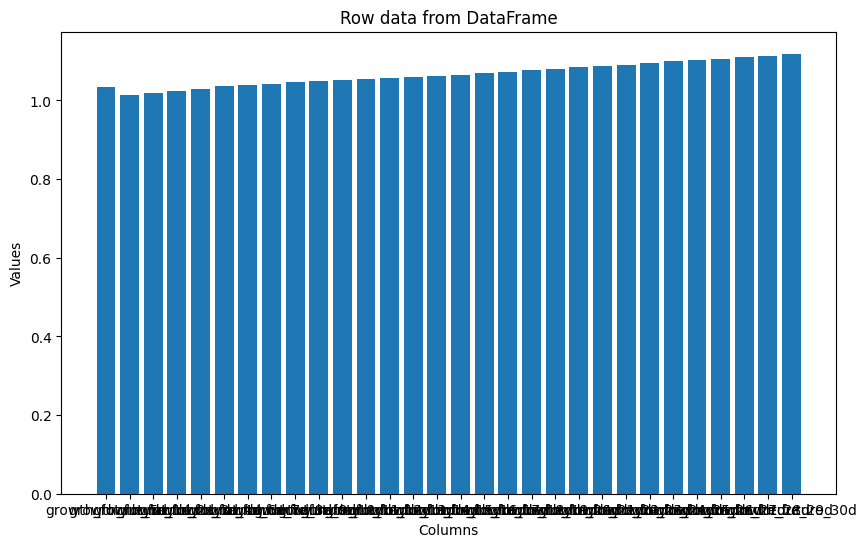

最大值是 1.119047638617361，在列 growth_future_30d 中.


In [56]:
import matplotlib.pyplot as plt

# 假设你的DataFrame是df，你想要获取的行的索引是index
row_data = df_growth.describe().loc['75%']

# 创建图表
plt.figure(figsize=(10,6))
plt.bar(row_data.index, row_data.values)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Row data from DataFrame')
plt.show()

# 找出最大值
max_value = row_data.max()
max_column = row_data.idxmax()
print(f'最大值是 {max_value}，在列 {max_column} 中.')
